# Завдання 2
Непараметрична регресія

Дані: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

In [37]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
df = pd.read_csv('Folds5x2_pp.csv')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


Алгоритм:

In [38]:
import pyqt_fit.nonparam_regression as smooth
from pyqt_fit import npr_methods
from pyqt_fit.kernels import normal_kernel,tricube
from sklearn.metrics import mean_squared_error

# create design matrix X and target vector y
X = np.array(df[['AT', 'V', 'AP', 'RH']]) # end index is exclusive
y = np.array(df['PE'])    # another way of indexing a pandas df

errors = []
iter_num = 40
for _ in range(40):
    # split into train and test
    X_train, \
    X_test, \
    y_train, \
    y_test = train_test_split(X, y, test_size=0.25)

    k0 = smooth.NonParamRegression(X_train.transpose(), y_train, method=npr_methods.SpatialAverage())
    k0.kernel = normal_kernel(4)
    k0.fit()

    errors.append(mean_squared_error(y_test, k0.evaluate(X_test.transpose())))

Середній-середній квадрат помилки

In [39]:
errors = np.array(errors)
print("{} +- {} MW/h".format(errors.mean(), errors.std()))

17.43689992063129 +- 0.8576284095753408 MW/h


Середня помилка у динаміці (40 розбиттів даних)

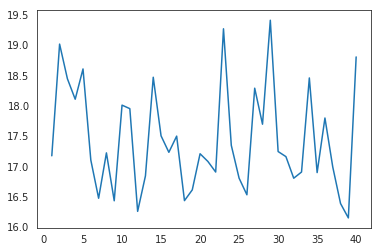

In [40]:
import seaborn as sns
sns.set_style("white")

sns.lineplot(list(range(1, iter_num+1)), errors)